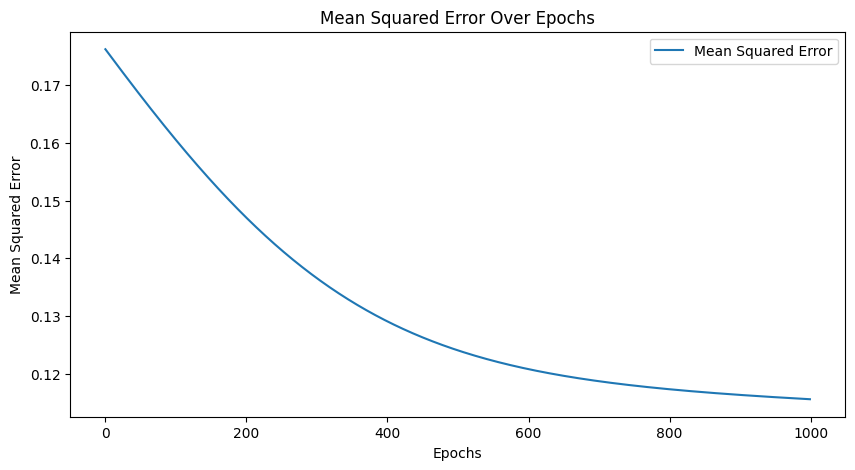

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Step a: Define initial data
X = np.array([0.5, 2.5])
Y = np.array([0.2, 0.9])

# Step b: Initialize a neural network with random weights
input_size = 1
hidden_size = 3
output_size = 1

weights_input_hidden = np.random.rand(input_size, hidden_size)
weights_hidden_output = np.random.rand(hidden_size, output_size)

bias_hidden = np.random.rand(hidden_size)
bias_output = np.random.rand(output_size)

# Step c to h: Backpropagation Neural Network
learning_rate = 0.01
num_epochs = 1000

mse_history = []

for epoch in range(num_epochs):
    total_error = 0

    for i in range(len(X)):
        # Step c: Calculate output of Neural Network
        input_layer = X[i]
        hidden_input = np.dot(input_layer, weights_input_hidden) + bias_hidden
        hidden_output = 1 / (1 + np.exp(-hidden_input))

        final_input = np.dot(hidden_output, weights_hidden_output) + bias_output
        final_output = 1 / (1 + np.exp(-final_input))

        # Step c(i): Calculate error
        error = Y[i] - final_output
        total_error += error**2

        # Step c(ii): Note weight and bias changes
        output_delta = error * (final_output * (1 - final_output))
        hidden_delta = np.dot(output_delta, weights_hidden_output.T) * (hidden_output * (1 - hidden_output))

        weights_hidden_output += learning_rate * np.outer(hidden_output, output_delta)
        bias_output += learning_rate * np.sum(output_delta)

        weights_input_hidden += learning_rate * np.outer(input_layer, hidden_delta)
        bias_hidden += learning_rate * np.sum(hidden_delta)

    # Step c(iii): Calculate squared error loss
    mse = total_error / len(X)
    mse_history.append(mse)

# Step g: Plot the mean squared error for each iteration
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), np.squeeze(mse_history), label='Mean Squared Error')
plt.title('Mean Squared Error Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()
